<a href="https://colab.research.google.com/github/Nate8888/physics-colab/blob/master/How_Distance_of_magnet_affects_Magnetic_Field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import chisquare
from google.colab import files
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#uploaded = files.upload()

Data_Frame = pd.read_csv('mag 0.5 inches.csv')
Data_Frame2 = pd.read_csv('mag 0.75 inches.csv')
Data_Frame3 = pd.read_csv('mag 1 inches.csv')
Data_Frame4 = pd.read_csv('mag 1.25 inches.csv')
Data_Frame5 = pd.read_csv('mag 1.5 inches.csv')
Data_Frame6 = pd.read_csv('mag 1.75 inches.csv')
Data_Frame7 = pd.read_csv('mag 2 inches.csv')
Data_Frame8 = pd.read_csv('mag 2.25 inches.csv')
Data_Frame9 = pd.read_csv('mag 2.5 inches.csv')
Data_Frame10 = pd.read_csv('mag 2.75 inches.csv')
Data_Frame11 = pd.read_csv('mag 3 inches.csv')
Data_Frame12 = pd.read_csv('mag 3.25 inches.csv')
Data_Frame13 = pd.read_csv('mag 3.5 inches.csv')
Data_Frame14 = pd.read_csv('mag 3.75 inches.csv')
Data_Frame15 = pd.read_csv('mag 4 inches.csv')





# Data_Frame2 = pd.read_csv(io.BytesIO(uploaded['mag 2 inches.csv']))
# Data_Frame3 = pd.read_csv(io.BytesIO(uploaded['mag 3 inches.csv']))
# Data_Frame4 = pd.read_csv(io.BytesIO(uploaded['mag 4 inches.csv']))

all_data_frames = [Data_Frame, Data_Frame2, Data_Frame3, Data_Frame4, Data_Frame5, Data_Frame6, Data_Frame7, Data_Frame8, Data_Frame9, Data_Frame10, Data_Frame11, Data_Frame12, Data_Frame13, Data_Frame14, Data_Frame15]


#chisquare([16, 18, 16, 14, 12, 12])

In [ ]:
#How we Access it.
# print("You just printed the first entry in the BT collumn")
#print(Data_Frame["BT"][0])

means = [0]*15
i = 0
for each_dataFrame in all_data_frames:
  means[i] = sum(each_dataFrame["BT"])/len(each_dataFrame["BT"])
  i += 1

print(means)

# Goes to all rows and print the column value from BT.
# for i in range(len(Data_Frame)):
#   print(Data_Frame["BT"][i]) 


[4435.624999999999, 1577.4198214285695, 1037.6855555555558, 513.3756204379561, 349.17768953068617, 296.6895636363634, 260.565543478261, 243.4365934065932, 173.92608108108104, 229.67059040590388, 192.1119163763066, 222.84152482269508, 154.0432014388489, 219.50165492957743, 163.11246268656723]


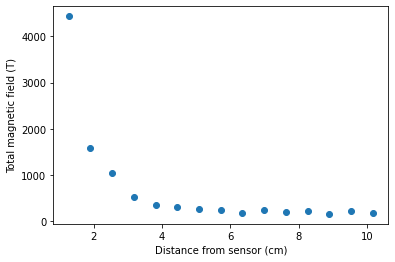

In [ ]:
fig = plt.figure();
ax = fig.add_subplot();
ax.set_xlabel('Distance from sensor (cm)');
ax.set_ylabel('Total magnetic field (T)');
x_points = [1.27, 1.905, 2.54, 3.175, 3.81, 4.445, 5.08, 5.715, 6.35, 6.985, 7.62, 8.255, 8.89, 9.525, 10.16];
ax.scatter(x_points, means);

Chi Squared: 21595233.125146594


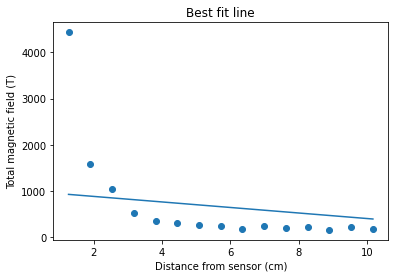

In [ ]:
m = -60;
b = 1000;

def eq_line(m, x, b):
  return (m*x)+b;

pred = [0] * len(x_points);
for i in range(len(x_points)):
  pred[i] = eq_line(m, x_points[0] + (0.635 * i), b);

total = 0;
for i in range(len(x_points)):
  uncert = np.std(all_data_frames[i]["BT"]) / np.sqrt(len(all_data_frames[i]["BT"]));
  total += ((means[i] - pred[i]) ** 2) / (uncert ** 2);
chi2_line = total / len(x_points);

print('Chi Squared:', chi2_line);
fig = plt.figure();
ax = fig.add_subplot();
ax.set_xlabel('Distance from sensor (cm)');
ax.set_ylabel('Total magnetic field (T)');
ax.set_title('Best fit line');
ax.scatter(x_points, means);
ax.plot(x_points, pred);

Chi Squared: 8635320.91557768


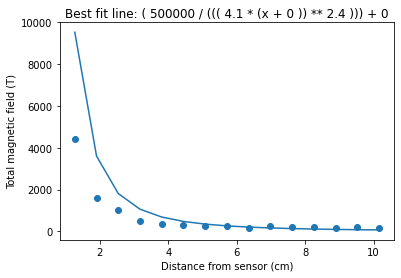

In [ ]:
#a = 256740;
a = 500000;
#b = 4;
b = 4.1;
c = 0;
#d = 2.508;
d = 2.4;
#e = 141;
e = 0;
#print(means[14]);

def eq_inverse(a, b, c, d, x):
  return (a / (((b * (x + c)) ** d))) + e;
  
pred = [0] * len(x_points);
for i in range(len(x_points)):
  pred[i] = eq_inverse(a, b, c, d, x_points[0] + (0.635 * i));

total = 0;
for i in range(len(x_points)):
  #if (i == 0): continue;
  uncert = np.std(all_data_frames[i]["BT"]) / np.sqrt(len(all_data_frames[i]["BT"]));
  #print(i, ':', uncert);
  total += ((means[i] - pred[i]) ** 2) / (uncert ** 2);
chi2_line = total / len(x_points);

print('Chi Squared:', chi2_line);
fig = plt.figure();
ax = fig.add_subplot();
ax.set_xlabel('Distance from sensor (cm)');
ax.set_ylabel('Total magnetic field (T)');
ax.set_title('Best fit line: ( ' + str(a) + ' / ((( ' + str(b) + ' * (x + ' + str(c) + ' )) ** ' + str(d) + ' ))) + ' + str(e));
ax.scatter(x_points, means);
ax.plot(x_points, pred);